       Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  FerienSH  Feiertag  Wochentag Jahreszeit  \
0                 14.0        58.0       1.0       1.0     Sunday     Winter   
1                 12.0         NaN       1.0       0.0     Monday     Winter   
2                 18.0        63.0       1.0       0.0    Tuesday     Winter   
3                 19.0        80.0       1.0       0.0  Wednesday     Winter   
4                 23.0        80.0       1.0       0.0   Thursday     Winter   

   Wochentag_num  Jahreszeit_num  
0              7               4  
1   

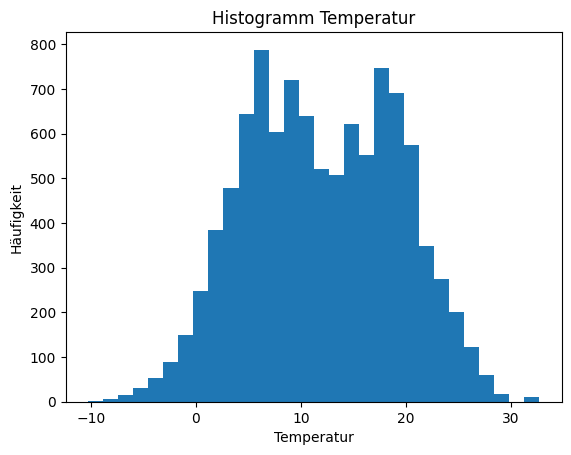

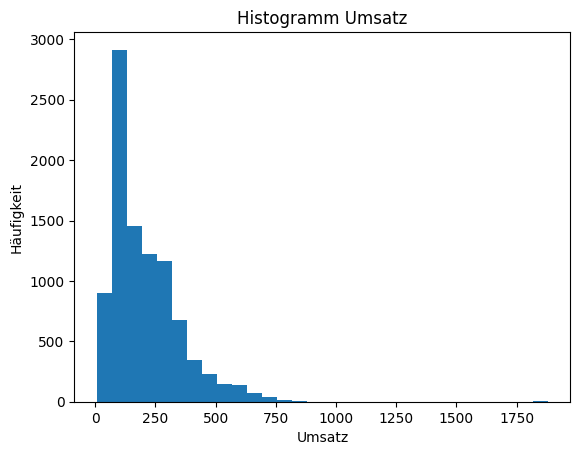

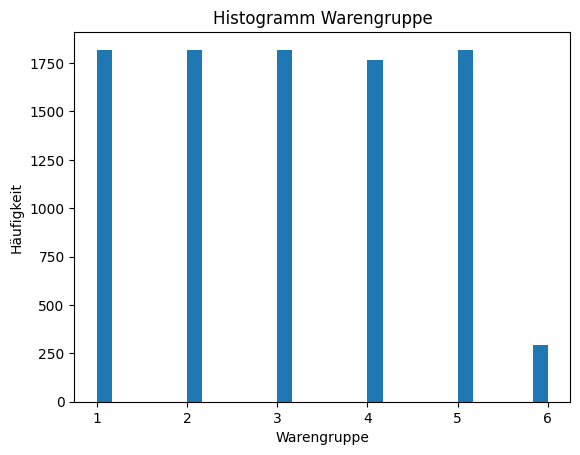

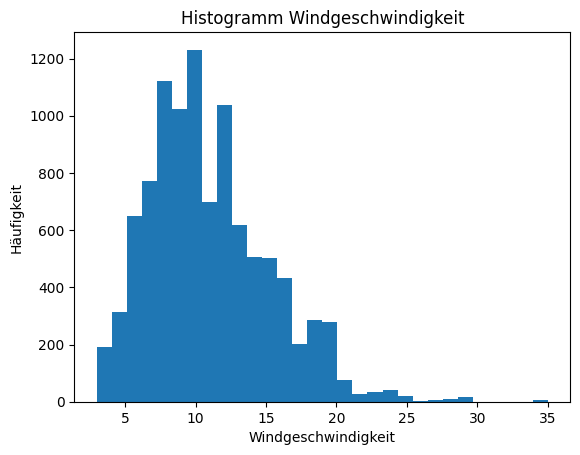

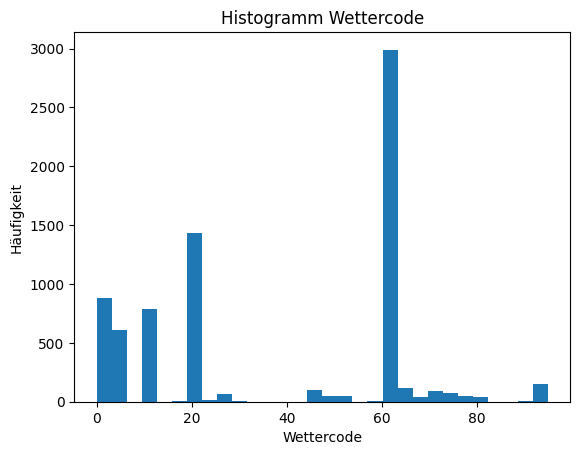

       Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  FerienSH  Feiertag  Wochentag Jahreszeit  \
0                 14.0        58.0       1.0       1.0     Sunday     Winter   
1                 12.0         NaN       1.0       0.0     Monday     Winter   
2                 18.0        63.0       1.0       0.0    Tuesday     Winter   
3                 19.0        80.0       1.0       0.0  Wednesday     Winter   
4                 23.0        80.0       1.0       0.0   Thursday     Winter   

   Wochentag_num  Jahreszeit_num  logUmsatz  asUmsatz   logWind  
0       

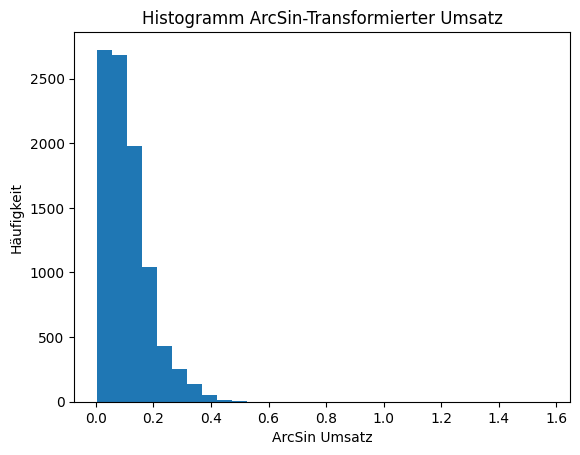

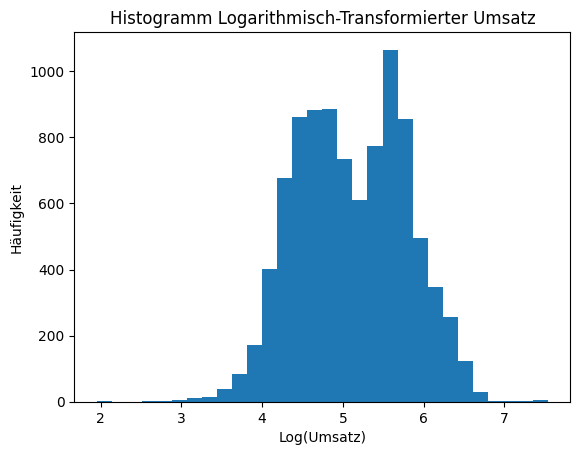

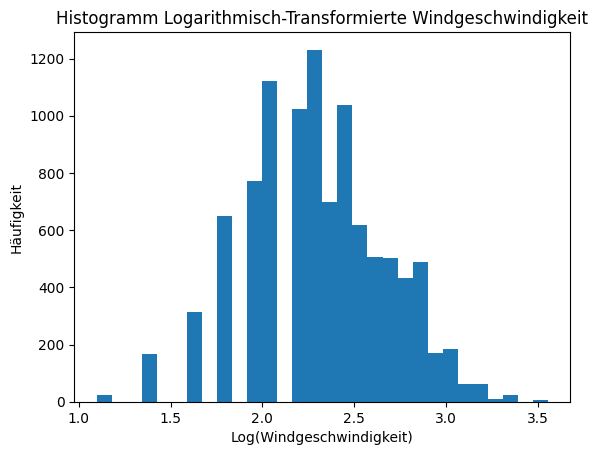

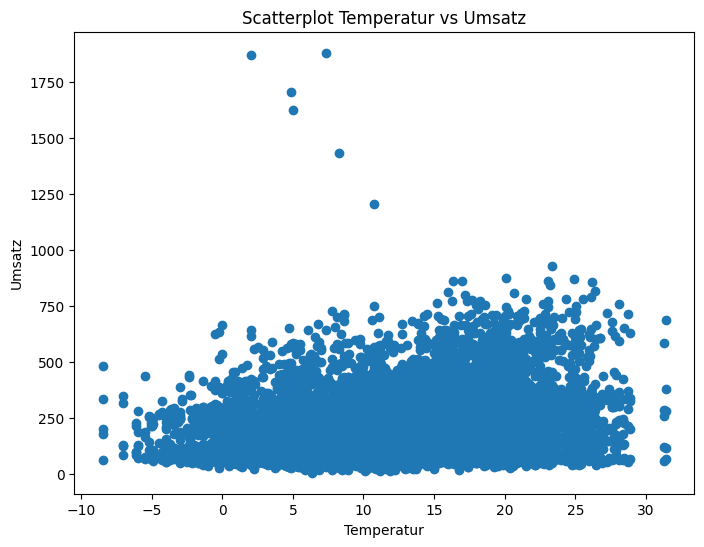

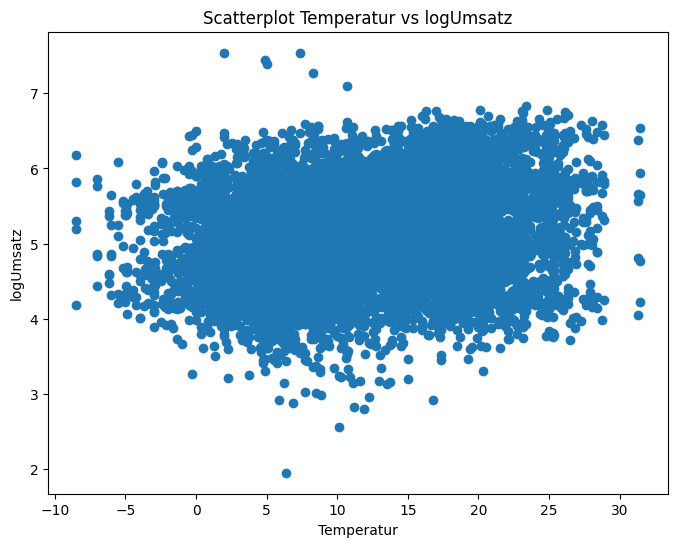

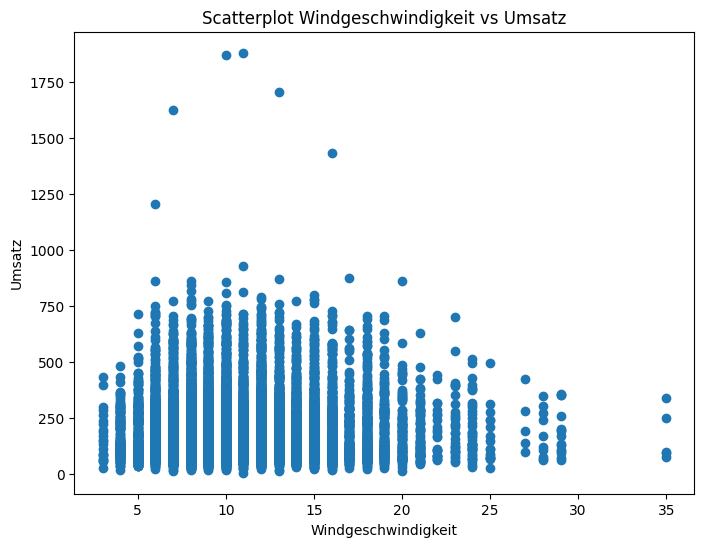

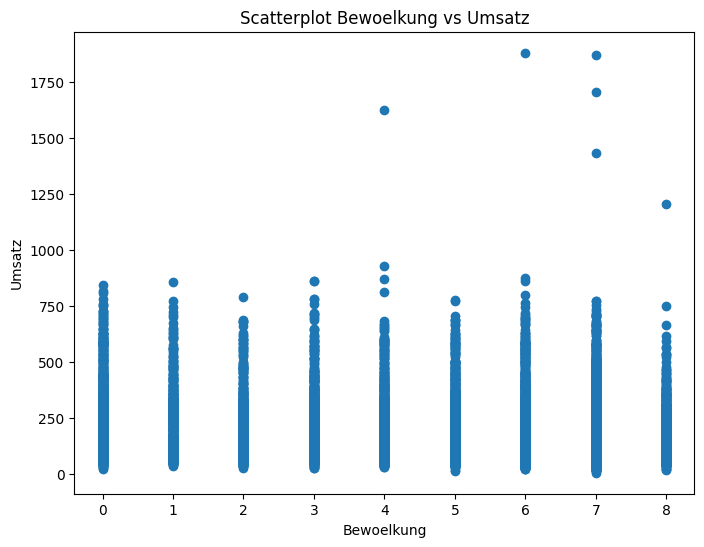

/tmp/ipykernel_13617/249351033.py:215: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['Umsatz'].dropna(), shade=True)


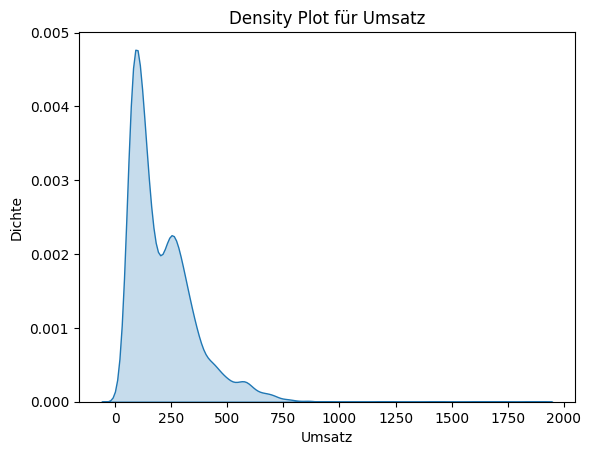

/tmp/ipykernel_13617/249351033.py:223: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['logUmsatz'].dropna(), shade=True)


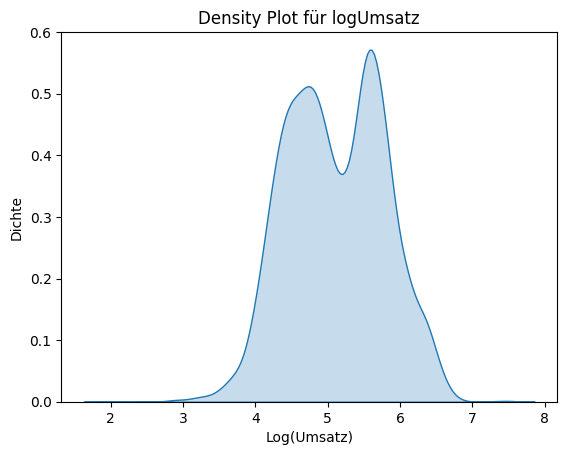

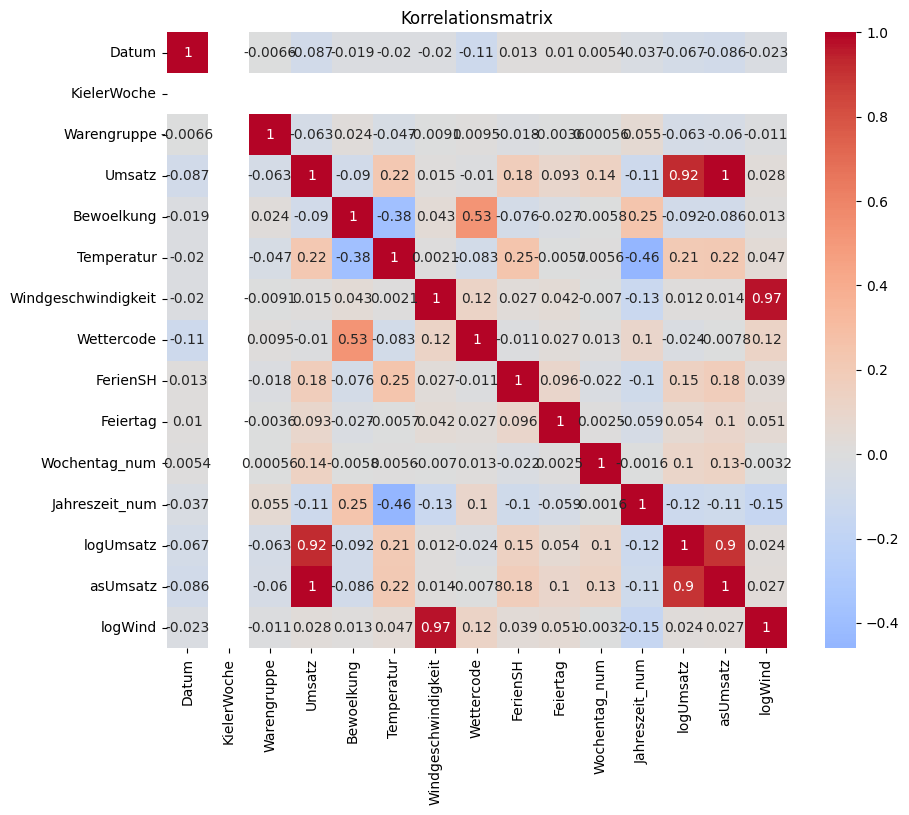

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     602.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        11:40:39   Log-Likelihood:                -54330.
No. Observations:                9318   AIC:                         1.087e+05
Df Residuals:                    9285   BIC:                         1.090e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from scipy import stats

## Zusammenführen der drei Datensätze in einem Dataframe
# Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum', 'FerienSH', 'Feiertag'])

# Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on='Datum')

# Konvertieren der 'Datum' Spalte in ein datetime-Objekt
merged_df['Datum'] = pd.to_datetime(merged_df['Datum'], format='%Y-%m-%d')

# Hinzufügen der Wochentag-Spalte
merged_df['Wochentag'] = merged_df['Datum'].dt.day_name()

# Funktion zur Bestimmung der Jahreszeit
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Frühling'
    elif date.month in [6, 7, 8]:
        return 'Sommer'
    elif date.month in [9, 10, 11]:
        return 'Herbst'
    else:
        return 'Winter'

# Hinzufügen der Jahreszeit-Spalte
merged_df['Jahreszeit'] = merged_df['Datum'].apply(get_season)

# Mapping für Wochentag
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Mapping für Jahreszeit
season_mapping = {
    'Frühling': 1,
    'Sommer': 2,
    'Herbst': 3,
    'Winter': 4
}

# Wochentag und Jahreszeit in Zahlenwerte umwandeln
merged_df['Wochentag_num'] = merged_df['Wochentag'].map(weekday_mapping)
merged_df['Jahreszeit_num'] = merged_df['Jahreszeit'].map(season_mapping)

# Anzeigen der ersten Zeilen des DataFrame
print(merged_df.head())

# Optional: Überprüfen auf fehlende Werte nach dem Mapping
print(merged_df[['Wochentag', 'Wochentag_num']].dropna().head())
print(merged_df[['Jahreszeit', 'Jahreszeit_num']].dropna().head())

# Anzeigen der ersten Zeilen des DataFrame
print(merged_df.head())

# Anzeigen der Information des DataFrame
print(merged_df.info())

# Anzeigen der Beschreibung des DataFrame
print(merged_df.describe())

# Wertverteilungen anzeigen
print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())
print(merged_df['FerienSH'].value_counts())
print(merged_df['Feiertag'].value_counts())
print(merged_df['Wettercode'].value_counts())
print(merged_df['Jahreszeit'].value_counts())

# HISTOGRAMME
# Umsatz
plt.hist(merged_df['Temperatur'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Häufigkeit')
plt.show()

# Umsatz
plt.hist(merged_df['Umsatz'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Häufigkeit')
plt.show()

# Warengruppe
plt.hist(merged_df['Warengruppe'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Häufigkeit')
plt.show()

# Windgeschwindigkeit
plt.hist(merged_df['Windgeschwindigkeit'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Häufigkeit')
plt.show()

# Wettercode
plt.hist(merged_df['Wettercode'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode')
plt.xlabel('Wettercode')
plt.ylabel('Häufigkeit')
plt.show()

# Transformieren der Variablen
merged_df['logUmsatz'] = np.log(merged_df['Umsatz'].replace(0, np.nan))
merged_df['asUmsatz'] = np.arcsin(merged_df['Umsatz'].replace(0, np.nan) / merged_df['Umsatz'].replace(0, np.nan).max())
merged_df['logWind'] = np.log(merged_df['Windgeschwindigkeit'].replace(0, np.nan))

# Anzeigen der ersten Zeilen des DataFrame
print(merged_df.head())

# Anzeigen der Information des DataFrame
print(merged_df.info())

# Anzeigen der Beschreibung des DataFrame
print(merged_df.describe())

# Histogramme für die transformierten Variablen

# asUmsatz
plt.hist(merged_df['asUmsatz'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm ArcSin-Transformierter Umsatz')
plt.xlabel('ArcSin Umsatz')
plt.ylabel('Häufigkeit')
plt.show()

# logUmsatz
plt.hist(merged_df['logUmsatz'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Logarithmisch-Transformierter Umsatz')
plt.xlabel('Log(Umsatz)')
plt.ylabel('Häufigkeit')
plt.show()

# logWind
plt.hist(merged_df['logWind'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Logarithmisch-Transformierte Windgeschwindigkeit')
plt.xlabel('Log(Windgeschwindigkeit)')
plt.ylabel('Häufigkeit')
plt.show()



# SCATTERPLOTS
#Temperatur vs.Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatterplot Temperatur vs Umsatz')
plt.show()

#Temperatur vs.logUmsatz
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Temperatur'], merged_df['logUmsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('logUmsatz')
plt.title('Scatterplot Temperatur vs logUmsatz')
plt.show()

#Windgeschwindigkeit vs.Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Umsatz')
plt.title('Scatterplot Windgeschwindigkeit vs Umsatz')
plt.show()

#Bewoelkung vs.Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Bewoelkung'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Bewoelkung')
plt.ylabel('Umsatz')
plt.title('Scatterplot Bewoelkung vs Umsatz')
plt.show()



# DENSITY PLOTS
# Density Plot erstellen
sns.kdeplot(merged_df['Umsatz'].dropna(), shade=True)
# Titel und Beschriftungen hinzufügen
plt.title('Density Plot für Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Dichte')
plt.show()

# Density Plot logUmsatz
sns.kdeplot(merged_df['logUmsatz'].dropna(), shade=True)
# Titel und Beschriftungen hinzufügen
plt.title('Density Plot für logUmsatz')
plt.xlabel('Log(Umsatz)')
plt.ylabel('Dichte')
plt.show()

#KORRELATIONSMATRIX

# Nicht-numerische Spalten aus dem DataFrame entfernen
numerical_df = merged_df.drop(['Wochentag', 'Jahreszeit'], axis=1)

# Korrelationsmatrix berechnen
corr_matrix = numerical_df.corr()

# Korrelationsmatrix plotten
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix')
plt.show()

# Lineares Modell
mod = smf.ols('Umsatz ~ C(Warengruppe) + C(Windgeschwindigkeit) + C(FerienSH)', data=merged_df).fit()

# Zusammenfassung des Modells
print(mod.summary())
